In [35]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
import math
import pandas as pd
import csv
import sklearn.covariance
import scipy.optimize
import sklearn.linear_model
import scipy.stats

In [36]:
with open('independent_modelling_no_independence.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:(float(item) if '.' in item else item) for key,item in result.items()} for result in results]
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max', 'best', 'bestSize', 'predicted']
lossKeys = ['independentModellingRate_0.0', 
            'independentModellingRate_0.1',
            'independentModellingRate_0.2',
            'independentModellingRate_0.3',
            'independentModellingRate_0.4',
            'independentModellingRate_0.5', 
            'independentModellingRate_0.6',
            'independentModellingRate_0.7',
            'independentModellingRate_0.8',
            'independentModellingRate_0.9',
            'independentModellingRate_1.0']

for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best
    result['bestSize'] = float(best[len('independentModellingRate_'):])

    
pd.DataFrame(results)

,best,best/median,bestSize,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,gamma,independentModellingRate_0.0,...,min,nEICandidates,num_parameters,priorWeight,range,secondaryCutoff,skew,std,stdvsmedian,stdvsmin
0,independentModellingRate_0.5,0.562757,0.5,0,0,0.333333,0.666667,0,1,0.098218,...,0.098218,,3,,0.363312,,1.428629,0.119252,0.694107,1.214154
1,independentModellingRate_0.7,0.736291,0.7,0,0.25,0.5,0.125,0.125,1,0.149072,...,0.149072,,8,,0.342717,,1.950796,0.073238,0.361338,0.491295
2,independentModellingRate_0.0,0.469603,0.0,0.333333,0,0,0,0.666667,1,0.055690,...,0.055690,,3,,0.297373,,1.700058,0.094600,0.787852,1.698686
3,independentModellingRate_0.7,0.730250,0.7,0,0.285714,0.285714,0.285714,0.142857,1,0.215653,...,0.215653,,7,,0.390726,,1.165665,0.064699,0.218963,0.300017
4,independentModellingRate_0.2,0.741317,0.2,0.3,0.1,0.1,0.3,0.2,1,0.212910,...,0.212910,,10,,0.339655,,0.860009,0.057374,0.200466,0.269476
5,independentModellingRate_0.3,0.872239,0.3,0.333333,0.0833333,0.333333,0.0833333,0.166667,1,0.262414,...,0.262414,,12,,0.380290,,1.513046,0.043494,0.144508,0.165746
6,independentModellingRate_0.4,0.768993,0.4,0.125,0.125,0.375,0.25,0.125,1,0.161076,...,0.161076,,8,,0.329571,,1.524715,0.065819,0.314885,0.408621
7,independentModellingRate_0.0,0.837369,0.0,0.1,0.1,0.1,0.4,0.3,1,0.256589,...,0.256589,,10,,0.393626,,1.507106,0.056019,0.182978,0.218323
8,independentModellingRate_0.3,0.876733,0.3,0.3125,0.125,0.375,0.125,0.0625,1,0.263800,...,0.263800,,16,,0.360932,,1.627202,0.036500,0.121169,0.138361
9,independentModellingRate_0.9,0.811213,0.9,0.166667,0.166667,0.0833333,0.166667,0.416667,1,0.268409,...,0.268409,,12,,0.382616,,1.103711,0.049201,0.148808,0.183306


<IPython.core.display.Javascript object>


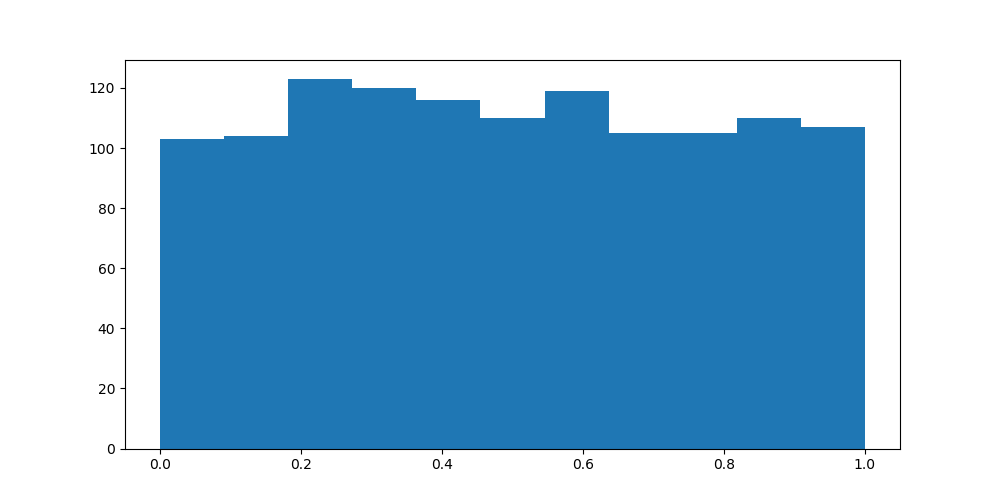

In [37]:
sizes = [result['bestSize'] for result in results]

averageSize = numpy.max(sizes)

ax, fig = plt.subplots()

fig.hist(sizes, bins=11)

fig


In [38]:
counts = {}
for key in lossKeys:
    counts[key]=0
for result in results:
    counts[result['best']] += 1


pprint(counts)

{'independentModellingRate_0.0': 103,
 'independentModellingRate_0.1': 104,
 'independentModellingRate_0.2': 123,
 'independentModellingRate_0.3': 120,
 'independentModellingRate_0.4': 116,
 'independentModellingRate_0.5': 110,
 'independentModellingRate_0.6': 119,
 'independentModellingRate_0.7': 105,
 'independentModellingRate_0.8': 105,
 'independentModellingRate_0.9': 110,
 'independentModellingRate_1.0': 107}


<IPython.core.display.Javascript object>


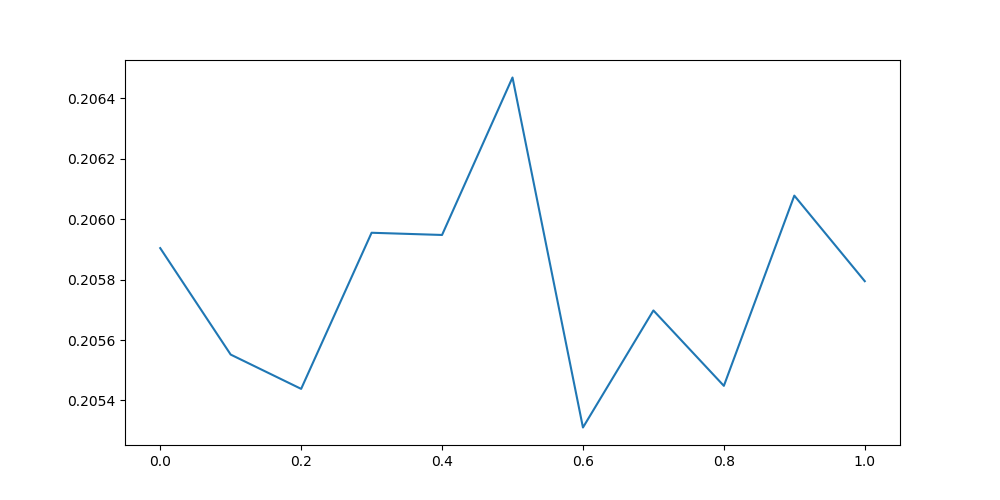

In [39]:
averageLoss = {}

for key in lossKeys:
    length = float(key[len('independentModellingRate_'):])
    averageLoss[length] = numpy.mean([result[key] for result in results])


averageLoss
ax, fig = plt.subplots()
fig.plot(averageLoss.keys(), averageLoss.values())
fig

In [15]:
labels = [key for key in results[0].keys() if key not in nonFeatureKeys and key not in lossKeys]

bestSizes = [result['bestSize'] for result in results]

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, bestSizes)[0]
    correlations.append({'name': label, 'correlation': correlation})

    
with open('correls.csv', 'wt') as file:
    writer = csv.DictWriter(file, fieldnames=['name','correlation'])
    writer.writeheader()
    writer.writerows(correlations)


correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,correlation,name
0,0.124416,kurtosis
1,0.101956,skew
2,0.078751,std
3,0.066231,interactions_peakvalley
4,0.053338,interactions
5,0.049907,contributions_random
6,0.043146,range
7,0.041762,best/median
8,-0.035857,log10_cardinality
9,-0.034885,contributions_logarithmic


In [16]:
def plot(variable, rounding, lim=None):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['bestSize'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    bestSizes = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueBestSizes = [bestSizes[i] for i in range(len(bestSizes)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueBestSizes))
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('secondaryCutoff')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,1,10))
    fig.set_ylim(0, 1.1)
    if lim:
        fig.set_xlim(0, lim)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, bestSizes)
    fig.plot(meanValues, means, 'r')
    return fig

<IPython.core.display.Javascript object>


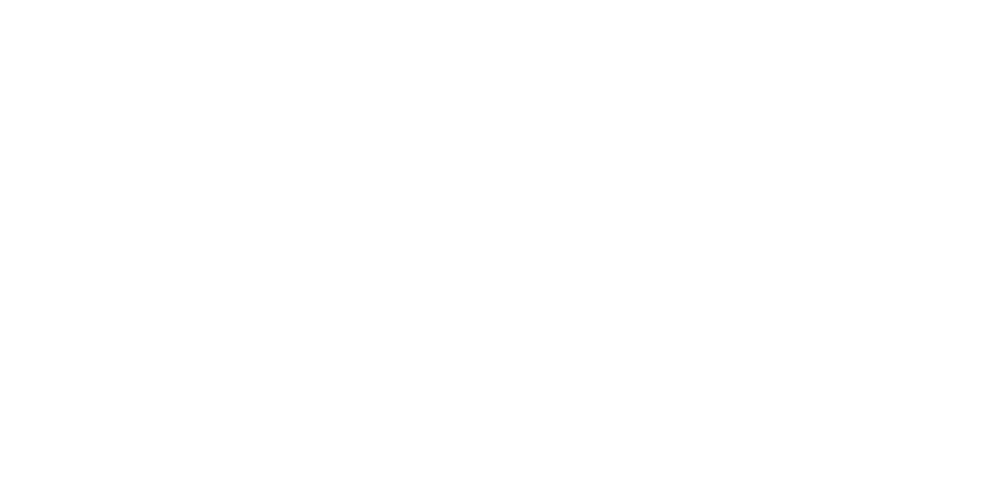

In [17]:
plot('log10_cardinality', 1)

<IPython.core.display.Javascript object>


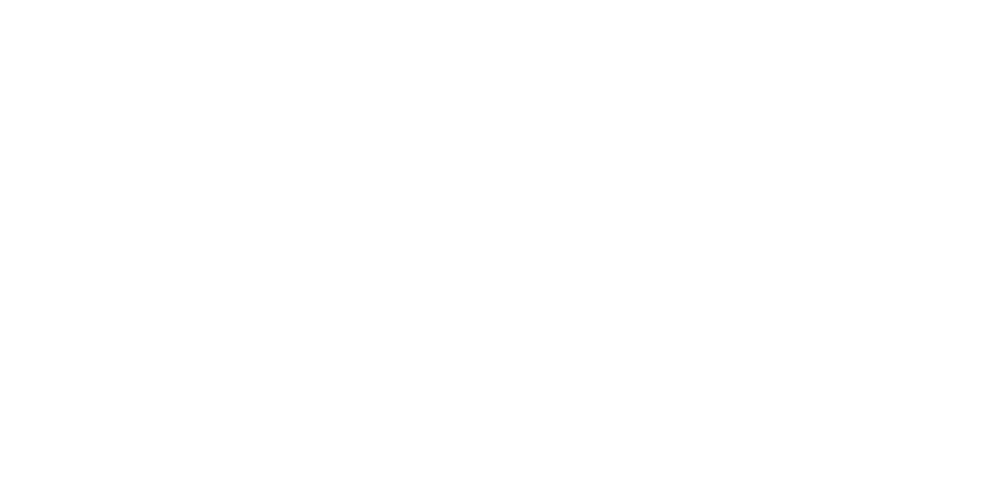

In [18]:
plot('stdvsmin', 0.1, 3)

<IPython.core.display.Javascript object>


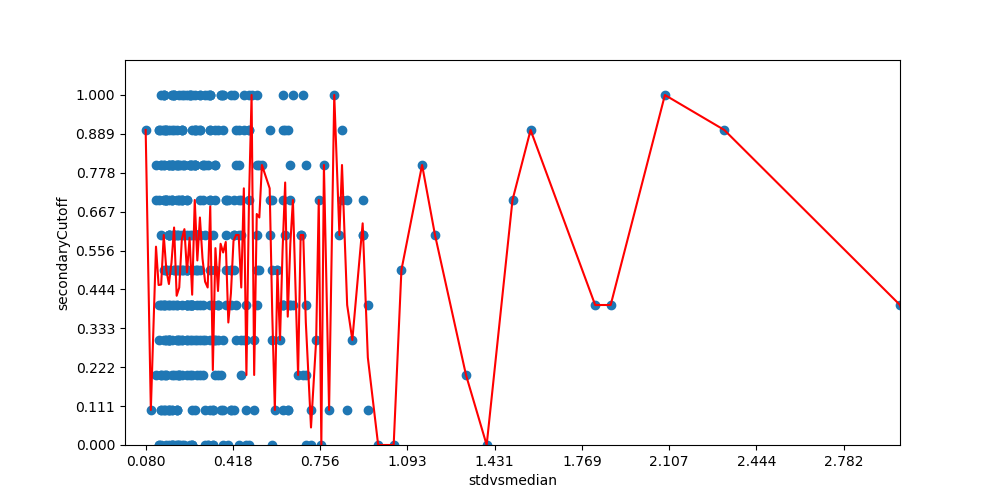

In [23]:
plot('stdvsmedian', 0.01, 3)

<IPython.core.display.Javascript object>


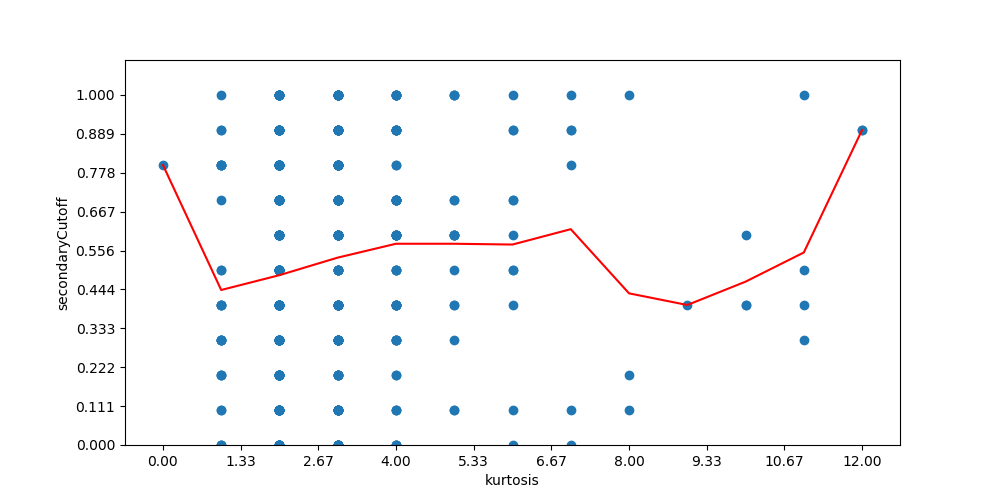

In [24]:
plot('kurtosis', 1)

<IPython.core.display.Javascript object>


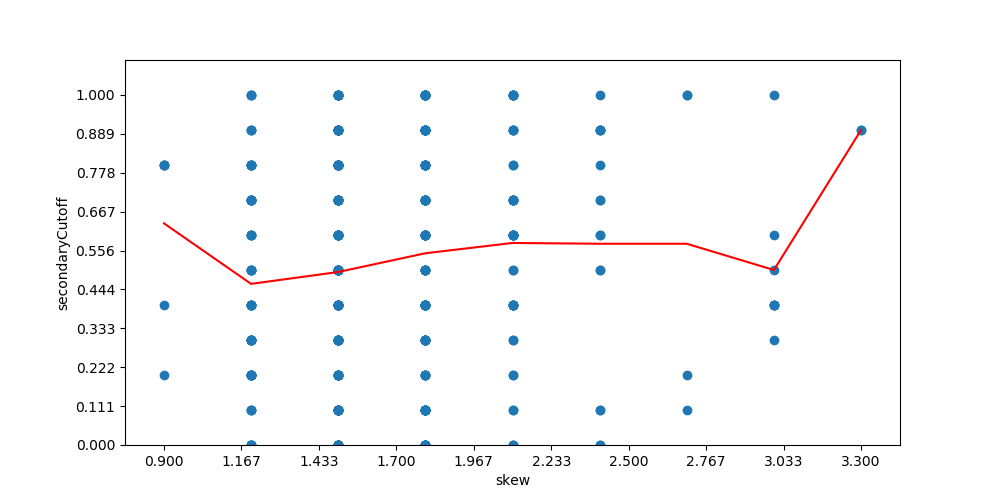

In [25]:
plot('skew', 0.3)

In [22]:
fields = sorted(results[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field and field not in lossKeys and field not in nonFeatureKeys]
vectors = [[float(result[f]) for f in fields] for result in features]
n_EI_candidates = [result['bestSize'] for result in results]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(n_EI_candidates))
deviations = numpy.std(vectors, axis=0)

rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

NameError: name 'features' is not defined

In [ ]:
predictors = ['skew', 'log10_cardinality']

filteredResults = results

vectors = [[result[predictor] for predictor in predictors] for result in filteredResults]
gammas = [result['bestSize'] for result in filteredResults]



model = sklearn.linear_model.Ridge(alpha = .5)
model.fit(vectors, gammas)


weights = {predictors[i]: model.coef_[i] for i in range(len(predictors))}
weights['intercept'] = model.intercept_
pd.DataFrame([weights])

In [ ]:
def roundPrecision(number, precision=3):
    """ Rounds the given floating point number to a certain precision, for output."""
    return float(('{:.' + str(precision) + 'E}').format(number))


equation = "Cutoff = " + str(roundPrecision(weights['intercept'], 1))
for predictor in predictors:
    equation += " + " + str(predictor) + " * " + str(roundPrecision(weights[predictor], 1))
print(equation)